In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras import Sequential

In [2]:

import zipfile
#wget gets the file and downloads its to the colab drive
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip the file now, this unzips and extract all extracts it on to the google drive
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2024-05-29 10:42:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   212MB/s    in 2.3s    

2024-05-29 10:42:31 (212 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

for dirpath ,dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and  {len(filenames)} images in {dirpath}")

There are 2 directories and  0 images in 10_food_classes_all_data
There are 10 directories and  0 images in 10_food_classes_all_data/test
There are 0 directories and  250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and  250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and  250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and  250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and  250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and  250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and  250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and  250 images in 10_food_classes_all_data/test/steak
There are 0 directories and  250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and  250 images in 10_food_classes_all_data/test/grilled_salmon
There are 10 directories and  0 im

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
datadir= pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in datadir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  image = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape :{image.shape}")
  return image

['401144.jpg']
Image shape :(512, 306, 3)


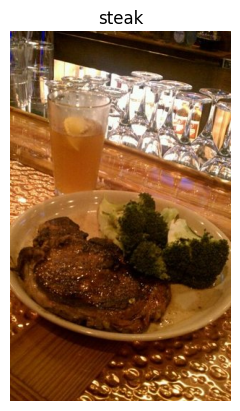

In [7]:
img = view_random_image(target_dir = train_dir,
                       target_class = random.choice(class_names))

In [8]:
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


#import data from directories and turn data into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
import tensorflow as tf


###Build a CNN model

model1 = Sequential([
    Conv2D(filters = 10, kernel_size =3,
                    activation="relu",
                    input_shape=(224,224,3)),
     Conv2D(10,3,activation="relu"),
     MaxPool2D(pool_size= 2, padding = "valid"),
     Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
   Dense(10,activation="softmax")

])


model1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics =["accuracy"])


history1= model1.fit(train_data,
                     epochs =5,
                     steps_per_epoch = len(train_data),
                     validation_data = test_data,
                     validation_steps = len(test_data) )

Epoch 1/5
235/235 [==============================] - 36s 134ms/step - loss: 2.1670 - accuracy: 0.2135 - val_loss: 1.9855 - val_accuracy: 0.2928
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 1.8440 - accuracy: 0.3692 - val_loss: 1.9047 - val_accuracy: 0.3312
Epoch 3/5
235/235 [==============================] - 29s 122ms/step - loss: 1.3704 - accuracy: 0.5484 - val_loss: 2.0483 - val_accuracy: 0.3148
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.7444 - accuracy: 0.7656 - val_loss: 2.5315 - val_accuracy: 0.2860
Epoch 5/5
235/235 [==============================] - 29s 124ms/step - loss: 0.2685 - accuracy: 0.9256 - val_loss: 3.5085 - val_accuracy: 0.2568


In [10]:
model1.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 3.5085 - accuracy: 0.2568


[3.5084543228149414, 0.25679999589920044]

In [11]:
def plot_loss_curves(history):
### Create the seperate loss curves for training and test sets

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))### produces the range (0,5)
  print(epochs)
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss, label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="training accuracy")
  plt.plot(epochs,val_accuracy, label="val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

range(0, 5)


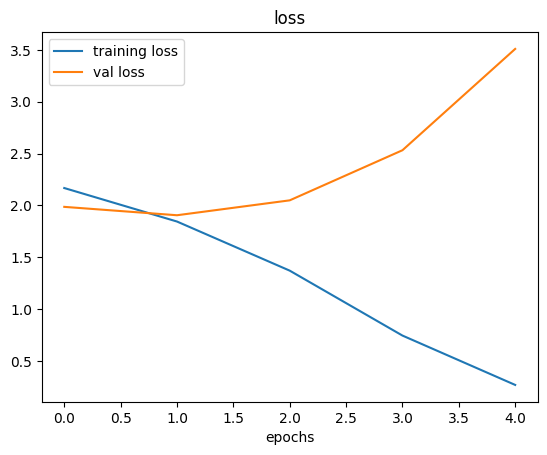

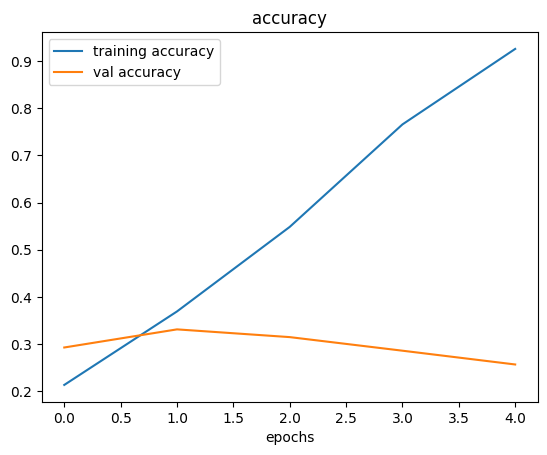

In [12]:
plot_loss_curves(history1)

In [13]:
## Seems our model is overfitting

train_datagen_augmented = ImageDataGenerator(rescale=(1/255.),
                                             rotation_range =0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range =0.3,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    class_mode="categorical",
                                                                    shuffle=False)


Found 7500 images belonging to 10 classes.


In [15]:
## Reducing the conv layer to simplify the model and pass the augmented the data

model2 = Sequential([
    Conv2D(filters = 10, kernel_size =3,
                    activation="relu",
                    input_shape=(224,224,3)),
     MaxPool2D(pool_size= 2, padding = "valid"),
     Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
   Dense(10,activation="softmax")

])


model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics =["accuracy"])


history2= model2.fit(train_data_augmented,
                     epochs =5,
                     steps_per_epoch = len(train_data_augmented),
                     validation_data = test_data,
                     validation_steps = len(test_data) )

Epoch 1/5
235/235 [==============================] - 108s 454ms/step - loss: 2.9637 - accuracy: 0.0624 - val_loss: 2.3028 - val_accuracy: 0.1036
Epoch 2/5
235/235 [==============================] - 105s 445ms/step - loss: 2.3043 - accuracy: 0.0944 - val_loss: 2.2977 - val_accuracy: 0.1292
Epoch 3/5
235/235 [==============================] - 106s 450ms/step - loss: 2.3013 - accuracy: 0.0924 - val_loss: 2.2883 - val_accuracy: 0.1248
Epoch 4/5
235/235 [==============================] - 105s 447ms/step - loss: 2.2994 - accuracy: 0.1143 - val_loss: 2.2832 - val_accuracy: 0.1356
Epoch 5/5
235/235 [==============================] - 104s 443ms/step - loss: 2.2945 - accuracy: 0.1203 - val_loss: 2.2675 - val_accuracy: 0.1584


In [18]:
def load_and_prep_image(filename, img_shape=(224)):
  #Read the iamge
  img = tf.io.read_file(filename)
  #decode and read file to tensor
  img = tf.image.decode_image(img)
  #resizing image
  img= tf.image.resize(img,size=[img_shape,img_shape])
  #rescale
  img= img/255.
  return img

In [22]:
class_names



array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 512, 306, 3)


In [43]:

def predictandplot(filename, model , classnames= class_names):
  img= load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  print(len(pred[0]))
  print(pred)
  if len(pred[0]) >1 :# this is multiclass as it has more than 2
    pred_class = classnames[tf.argmax(pred[0])]
  else:
    pred_class = classnames[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 27ms/step
10
[[0.09675904 0.1084939  0.09537666 0.09038919 0.10262064 0.09467099
  0.1079629  0.10207533 0.10350914 0.09814226]]


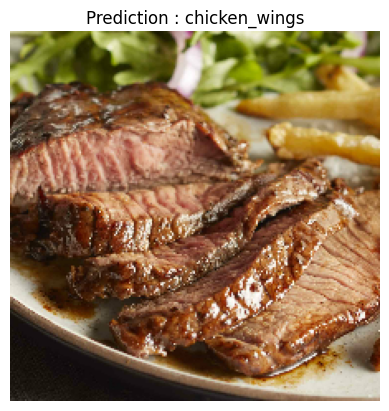

In [44]:
predictandplot(filename="steaknew.jpg",model=model2)

In [45]:
model2.save("Multiclass_saved_model_2")

In [46]:
loaded_model_2 = tf.keras.models.load_model("Multiclass_saved_model_2")

In [48]:
loaded_model_2.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 2.2675 - accuracy: 0.1584


[2.267465114593506, 0.15839999914169312]